In [11]:
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
import time
import tensorflow as tf
%matplotlib inline

# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [12]:
mnist.train.images.shape

(55000, 784)

In [13]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels
y_test = mnist.test.labels

In [14]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
sgd = SGDClassifier(max_iter = 100, loss = 'log', 
                   penalty='none', tol=1e-3, n_jobs=-1)
#grid search eta0 
parameters = {'eta0': [0.001, 0.0001, 0.01, 0.1, 1, 10],  
                  'learning_rate': ['constant']}
clf = GridSearchCV(sgd, parameters, cv=5)

In [21]:
clf.fit(X_test, y_test)
print(clf.best_params_) #'eta0': 0.01, 'learning_rate': 'constant'

{'eta0': 0.01, 'learning_rate': 'constant'}


In [17]:
clf.score(X_test, y_test)

0.93210000000000004

In [18]:
sgd_best = SGDClassifier(loss = 'log',penalty='none', tol=1e-3, 
                         eta0=0.01, learning_rate='constant')

In [19]:
param_range = np.logspace(0, 2, 10)
train_scores, test_scores = validation_curve(sgd_best, 
            X_train, y_train, param_name = "max_iter", param_range = param_range, 
            cv=5, scoring="accuracy", n_jobs=-1)

/home/mobeiusprime/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/mobeiusprime/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/mobeiusprime/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/mobeiusprime/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Converge

In [22]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(test_scores, axis=1)

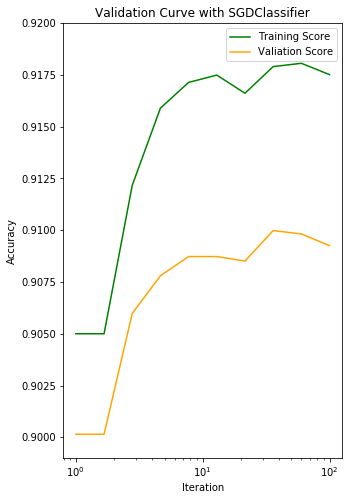

In [37]:
# Confusion Matrix and Training Speed (time and iteration)
plt.title("Validation Curve with SGDClassifier")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.ylim(0.899, 0.92)
plt.semilogx(param_range, train_scores_mean, label="Training Score", color="green")
plt.semilogx(param_range, val_scores_mean, label="Valiation Score", color="orange")
plt.legend(loc="best")
plt.rcParams["figure.figsize"] = [5, 8]
plt.show()

In [48]:
param_range = np.logspace(0, 2.5, 10)
times = [] 
train_scores = [] 
test_scores = [] 
for iteration in param_range: 
    sgd_temp = SGDClassifier(loss = 'log',penalty='none', tol=0, eta0=0.001, learning_rate='constant', max_iter = iteration)
    start = time.time()
    sgd_temp.fit(X_train, y_train)
    train_scores.append(sgd_temp.score(X_train, y_train))
    test_scores.append(sgd_temp.score(X_test, y_test))
    times.append(time.time()-start)
    
print(times) 
print("")
print(train_scores)
print("")
print(test_scores)

/home/mobeiusprime/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[1.4340765476226807, 1.3497483730316162, 3.3839921951293945, 6.247416257858276, 12.372493743896484, 24.424023866653442, 39.409475326538086, 42.036707401275635, 44.11540341377258, 41.55750250816345]

[0.88454545454545452, 0.88492727272727267, 0.8996909090909091, 0.90736363636363637, 0.91223636363636362, 0.9166545454545455, 0.92000000000000004, 0.91879999999999995, 0.92012727272727268, 0.91969090909090911]

[0.89349999999999996, 0.89459999999999995, 0.90659999999999996, 0.91349999999999998, 0.91490000000000005, 0.9173, 0.91890000000000005, 0.91739999999999999, 0.91910000000000003, 0.91869999999999996]


In [49]:
param_range

array([   1.        ,    1.89573565,    3.59381366,    6.81292069,
         12.91549665,   24.48436747,   46.41588834,   87.99225436,
        166.81005372,  316.22776602])

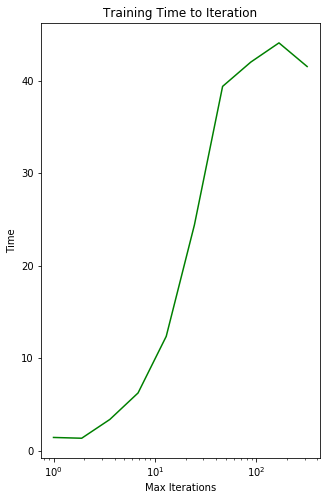

In [50]:
plt.title("Training Time to Iteration")
plt.xlabel("Max Iterations")
plt.ylabel("Time")
plt.semilogx(param_range, times, color="green")
plt.legend(loc="best")
plt.rcParams["figure.figsize"] = [5, 8]
plt.show()